<h2><b> GAME ENVIRONMENT CODE & BASIC FUNCTIONS</b></h2>

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from game import Game
from racing_env import RaceGameEnv
from PIL import Image
from io import BytesIO
from tf_agents.environments import utils
from tf_agents.networks import q_network
from tf_agents.agents.dqn import dqn_agent
from tf_agents.utils import common
from tf_agents.environments import tf_py_environment
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory

In [2]:
game = Game()

serving at port 8000
127.0.0.1 - - [15/Jun/2020 21:15:17] "GET /v4.final.noCars.html HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:17] "GET /common.css HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:17] "GET /stats.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:17] "GET /common.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:18] "GET /music/racer.ogg HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:18] "GET /images/mute.png HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:18] "GET /images/background.png HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:18] "GET /images/sprites.png HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 21:15:19] code 404, message File not found
127.0.0.1 - - [15/Jun/2020 21:15:19] "GET /favicon.ico HTTP/1.1" 404 -


(55, 240)


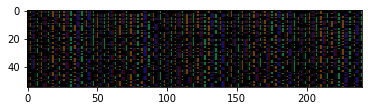

In [3]:
for i in range(1):

    img = game.takess()
    print(img.shape)
    im = Image.fromarray(img, 'RGB')    
    imgplot = plt.imshow(im,cmap=plt.cm.binary)
    #plt.show()

    #im.save("screenshot.jpeg")
    game.getSpead()
    game.move('up')

game.resetGame()

<h2><b> TENSORFLOW ENVIRONMENT CODE </b></h2>

In [3]:
env = RaceGameEnv()
#env = tf_py_environment.TFPyEnvironment(env)
#utils.validate_py_environment(env, episodes=1)

serving at port 8000
127.0.0.1 - - [15/Jun/2020 20:43:17] "GET /v4.final.noCars.html HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 20:43:18] "GET /common.css HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 20:43:18] "GET /stats.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 20:43:18] "GET /common.js HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2020 20:43:18] "GET /music/racer.ogg HTTP/1.1" 200 -
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 59967)
Traceback (most recent call last):
  File "c:\program files\python37\Lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\program files\python37\Lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "c:\program files\python37\Lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\program files\python37\Lib\http\ser

In [4]:
utils.validate_py_environment(env, episodes=1)

127.0.0.1 - - [15/Jun/2020 20:43:34] code 404, message File not found
127.0.0.1 - - [15/Jun/2020 20:43:34] "GET /favicon.ico HTTP/1.1" 404 -
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED


In [5]:
env = tf_py_environment.TFPyEnvironment(env)

In [6]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 1000  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_max_length = 1000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-6  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}


In [7]:
#fc_layer_params = (200,)
fc_layer_params = (75,25)

##q_net = q_network.QNetwork(
#    env.observation_spec(),
#    env.action_spec(),
#    fc_layer_params=fc_layer_params)

conv_layer_params = [( 32 , ( 5 , 5 ), 1 ), ( 64 , ( 3 , 3 ), 1 )]

q_net = q_network.QNetwork(
    env.observation_spec(),
    env.action_spec(),
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params)




In [8]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.Variable(0)

agent = dqn_agent.DqnAgent(
    env.time_step_spec(),
    env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    train_step_counter=train_step_counter)

agent.initialize()



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [9]:
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


In [10]:
random_policy = random_tf_policy.RandomTFPolicy(env.time_step_spec(),
env.action_spec())

random_return = compute_avg_return(env, random_policy, num_eval_episodes)

env._reset()
print("Return from Random agent is " + str(random_return))

RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
Return from Random agent is -197.5


In [11]:
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=env.batch_size,
    max_length=replay_buffer_max_length)

agent.collect_data_spec._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [12]:
def collect_step(environment, policy, buffer):
  time_step = environment.current_time_step()
  action_step = policy.action(time_step)
  next_time_step = environment.step(action_step.action)
  traj = trajectory.from_transition(time_step, action_step, next_time_step)

  # Add trajectory to the replay buffer
  buffer.add_batch(traj)

def collect_data(env, policy, buffer, steps):
  for _ in range(steps):
    collect_step(env, policy, buffer)

collect_data(env, random_policy, replay_buffer, steps=1000)

# This loop is so common in RL, that we provide standard implementations. 
# For more details see the drivers module.
# https://www.tensorflow.org/agents/api_docs/python/tf_agents/drivers


GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TR

In [13]:
# Dataset generates trajectories with shape [Bx2x...]
dataset = replay_buffer.as_dataset(
    num_parallel_calls=3, 
    sample_batch_size=batch_size, 
    num_steps=2).prefetch(3)


dataset

<PrefetchDataset shapes: (Trajectory(step_type=(64, 2), observation=(64, 2, 55, 240, 3), action=(64, 2), policy_info=(), next_step_type=(64, 2), reward=(64, 2), discount=(64, 2)), BufferInfo(ids=(64, 2), probabilities=(64,))), types: (Trajectory(step_type=tf.int32, observation=tf.float64, action=tf.int32, policy_info=(), next_step_type=tf.int32, reward=tf.float32, discount=tf.float32), BufferInfo(ids=tf.int64, probabilities=tf.float32))>

In [14]:
iterator = iter(dataset)

print(iterator)


In [15]:

try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
agent.train = common.function(agent.train)

# Reset the train step
agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(env, agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few steps using collect_policy and save to the replay buffer.
  for _ in range(collect_steps_per_iteration):
    collect_step(env, agent.collect_policy, replay_buffer)

  # Sample a batch of data from the buffer and update the agent's network.
  experience, unused_info = next(iterator)
  train_loss = agent.train(experience).loss

  step = agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(env, agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)


RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
GAME OVER
RESET METHOD IS TRIGGERED
step = 200: loss = 2829.4951171875


KeyboardInterrupt: 